# Data Preparation
The variable x_train contains 3 EEG channels, 140 trials with 9 seconds each. Each trial has 1152 units of data. Thus, each second in a trial produces 128 units of signal data. The variable y_train contains the classlabels ‘1’, ‘2’ for left and right, respectively. x_test contains another set of 140 trials. The cue was presented from t = 3s to 9s. At the same time, the feedback was presented to the subject. Within this period, it should be possible to distinguish the two types of trials. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
data = pd.read_csv('x_train.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,410,411,412,413,414,415,416,417,418,419
0,0.010254,0.081055,0.062500,-0.091797,-0.057617,-0.084473,0.056641,0.061523,0.039062,-0.125490,...,0.019531,0.045410,0.035156,0.070312,0.023926,-0.050293,-0.012207,0.041504,0.044434,0.095703
1,-0.023926,0.076172,0.034180,-0.080078,-0.026367,-0.105960,0.009277,0.041992,0.031738,-0.114260,...,0.134770,0.116210,0.073730,0.084473,0.007812,-0.053711,-0.034668,0.063965,0.070801,0.067871
2,-0.009766,0.077637,0.065918,-0.073730,0.004883,-0.086426,-0.078613,0.015625,0.012695,-0.109860,...,0.162110,0.135740,0.081543,0.042480,0.040527,0.019043,-0.011719,0.050781,0.050293,-0.002441
3,0.048828,0.112300,0.123050,-0.067871,-0.020996,-0.076172,-0.157230,-0.002930,-0.024902,-0.101070,...,0.160640,0.101560,0.058594,0.003906,0.104980,0.063477,-0.006348,0.053223,0.066895,-0.007812
4,-0.038086,0.037109,0.066895,-0.092773,-0.029297,-0.067871,-0.153320,-0.011230,-0.027344,-0.097168,...,0.144040,0.063965,0.061035,-0.001465,0.103030,0.086914,0.011719,0.042480,0.098633,0.025391


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Columns: 420 entries, 0 to 419
dtypes: float64(420)
memory usage: 3.7 MB


In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,410,411,412,413,414,415,416,417,418,419
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,...,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,-0.001096,-0.000807,-0.001366,-0.003607,-0.004327,-0.003292,0.001268,0.000935,0.000061,0.001479,...,-0.000958,-0.000747,0.002211,0.000488,0.001813,0.002936,0.001481,-0.000760,0.003910,0.000398
std,0.063368,0.069890,0.067713,0.067318,0.066974,0.075070,0.092757,0.073431,0.066523,0.059947,...,0.125157,0.117597,0.150653,0.121240,0.076571,0.081800,0.089683,0.121255,0.104085,0.087604
min,-0.181150,-0.219730,-0.252440,-0.258300,-0.268550,-0.351070,-0.291990,-0.228520,-0.241210,-0.225590,...,-0.497560,-0.540040,-0.437500,-0.452640,-0.271970,-0.210940,-0.329100,-0.393070,-0.354490,-0.299800
25%,-0.041138,-0.047485,-0.047852,-0.046387,-0.049316,-0.047363,-0.056152,-0.046997,-0.041504,-0.038574,...,-0.078735,-0.066895,-0.088989,-0.066040,-0.043945,-0.055664,-0.048340,-0.077759,-0.062500,-0.052856
50%,-0.003418,-0.000732,-0.002441,-0.004150,-0.002197,-0.001953,0.003174,0.003174,0.002197,0.000977,...,0.008789,0.011963,0.000244,0.008545,0.004150,0.001221,0.003662,0.007812,0.003906,0.004639
75%,0.041626,0.042114,0.046020,0.039551,0.039184,0.046020,0.065918,0.050781,0.044434,0.042602,...,0.079102,0.077270,0.091309,0.083008,0.053345,0.061523,0.062012,0.091919,0.070801,0.058594
max,0.225590,0.245610,0.215330,0.279790,0.250490,0.264160,0.234380,0.209960,0.196780,0.205080,...,0.377440,0.378420,0.629390,0.382320,0.267090,0.256840,0.237790,0.285160,0.297850,0.263180


In [5]:
rows_to_drop = []
for i in range(256):
    rows_to_drop.append(i)
data = data.drop(labels = rows_to_drop, axis = 0) # Removing the first two seconds from all trials

In [6]:
data = data.values
sensor1 = np.zeros((896,140))
sensor2 = np.zeros((896,140))
sensor3 = np.zeros((896,140))
column = 0
column2 = 0
column3 = 0
for i in range(420):
    if i<140:
        sensor1[:,column] = data[:,i]
        column += 1
    elif i>=140 and i<280:
        sensor2[:,column2] = data[:,i]
        column2 += 1
    elif i>=280 and i<420:
        sensor3[:,column3] = data[:,i]
        column3 += 1
sensor1 = sensor1.T
sensor2 = sensor2.T
sensor3 = sensor3.T

In [7]:
sensor1.shape

(140, 896)

In [8]:
sensor2.shape

(140, 896)

In [9]:
sensor3.shape

(140, 896)

In [10]:
print(sensor1)

[[-0.16064    -0.12695    -0.059082   ...  0.1084      0.17334
   0.22559   ]
 [-0.063477   -0.074707    0.0073242  ...  0.13135     0.18359
   0.24561   ]
 [-0.23193    -0.25244    -0.20996    ...  0.064941    0.10449
   0.12939   ]
 ...
 [ 0.13867     0.10938     0.054688   ...  0.037109    0.046875
   0.037598  ]
 [-0.043457   -0.033691   -0.003418   ...  0.076172    0.056152
   0.019531  ]
 [-0.020508    0.029297    0.034668   ...  0.018066    0.026855
  -0.00048828]]


In [11]:
print(sensor2)

[[-0.037109   -0.011719   -0.0048828  ...  0.038086    0.01416
  -0.0097656 ]
 [-0.027832   -0.09082    -0.12695    ...  0.079102   -0.0087891
  -0.024414  ]
 [-0.066895   -0.11182    -0.13184    ... -0.00097656 -0.045898
  -0.052246  ]
 ...
 [ 0.02002     0.16357     0.20557    ...  0.08252     0.060547
  -0.026855  ]
 [ 0.054199    0.18018     0.22949    ...  0.062988    0.10449
   0.086914  ]
 [ 0.049805    0.11035     0.14014    ... -0.11865    -0.054199
  -0.0048828 ]]


In [12]:
print(sensor3)

[[ 0.086914    0.10889     0.09375    ... -0.15283    -0.063477
  -0.04834   ]
 [ 0.019531    0.036133    0.068359   ... -0.057129   -0.043945
  -0.085449  ]
 [ 0.064453    0.052246    0.029785   ... -0.067871   -0.13965
  -0.19727   ]
 ...
 [ 0.050781    0.13428     0.21582    ...  0.098145    0.18311
   0.18652   ]
 [-0.046387    0.039062    0.16797    ...  0.0048828   0.1582
   0.1582    ]
 [ 0.00048828  0.045898    0.13477    ... -0.016113    0.092285
   0.13379   ]]


In [13]:
sensor = np.stack((sensor1, sensor3), axis = 1)
sensor = sensor.reshape((2,140,896))
sensor = sensor.reshape(sensor.shape[0], (sensor.shape[1] * sensor.shape[2]))
sensor.shape

(2, 125440)

In [14]:
ch_names = ['C3', 'C4']

# Converting data to signals
We are converting the data which is present in the form of a .csv file into a raw signal data for the ease of processing, feature extraction and feature selection.

In [15]:
!pip install mne
!pip install PyQt5

You should consider upgrading via the 'c:\users\91974\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\91974\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [16]:
from mne.io import RawArray
import mne
import matplotlib
import PyQt5
info_sensor = mne.create_info(ch_names = ch_names, sfreq = 128, ch_types=['eeg']*2) #The no. of trials are 140 and each trial is sampled at 128 Hz. Hence, sfreq = 128.
raw = RawArray(sensor, info = info_sensor)

Creating RawArray with float64 data, n_channels=2, n_times=125440
    Range : 0 ... 125439 =      0.000 ...   979.992 secs
Ready.


# Checking for bad channels

Not setting metadata
Not setting metadata
140 matching events found
No baseline correction applied
0 projection items activated


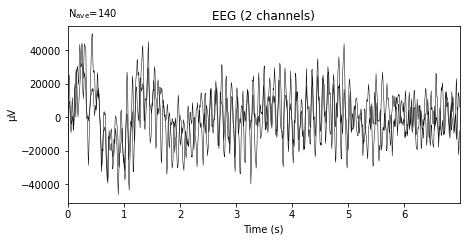

In [17]:
raw2 = raw.copy()
raw2.info['bads'] = []
epochs2 = mne.make_fixed_length_epochs(raw, duration = 7).average().plot()

From the above figure, we can visualize that there are no bad channels among the 3 channels.

# Applying Low-Pass filter

Effective window size : 16.000 (s)


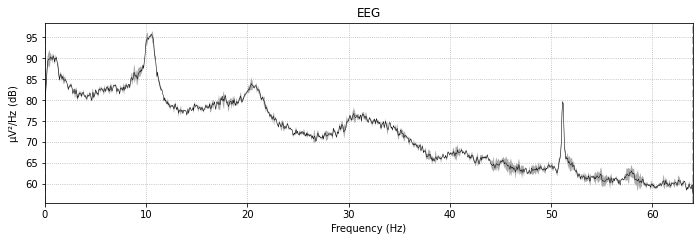

Text(0.5, 0.98, 'UnFiltered Cz')

In [18]:
# Before applying Low-Pass Filter
fig = raw.plot_psd(fmax=64, average=True)
fig.subplots_adjust(top=0.85)
fig.suptitle('UnFiltered Cz', size='xx-large', weight='bold')

From the above figure, we can visualize that Power-Line noise exists at 1, 10.5, 20 and 51 Hz.

In [19]:
raw = raw.copy().filter(l_freq=None, h_freq=40)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 43 samples (0.336 sec)



Effective window size : 16.000 (s)


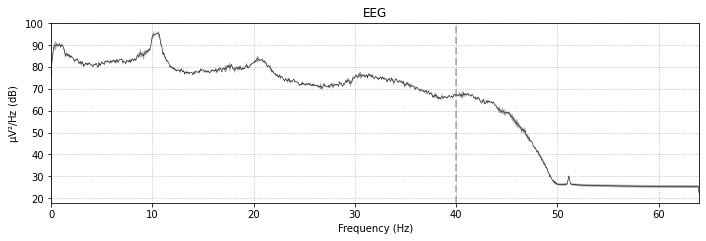

Text(0.5, 0.98, 'UnFiltered Cz')

In [20]:
#After Applying Low-pass Filter
fig = raw.plot_psd(fmax=64, average=True)
fig.subplots_adjust(top=0.85)
fig.suptitle('UnFiltered Cz', size='xx-large', weight='bold')

# Filtering Slow-Drifts in data using High-Pass Filter

Effective window size : 16.000 (s)


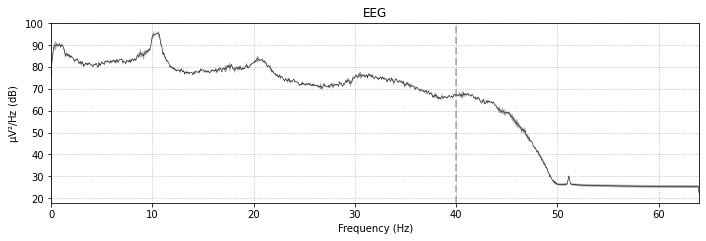

Text(0.5, 0.98, 'UnFiltered Cz')

In [21]:
# Before applying Low-Pass Filter
fig = raw.plot_psd(fmax=64, average=True)
fig.subplots_adjust(top=0.85)
fig.suptitle('UnFiltered Cz', size='xx-large', weight='bold')

In [22]:
raw = raw.copy().filter(l_freq = 1., h_freq=None) #filtering slow drifts from data

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 423 samples (3.305 sec)



Effective window size : 16.000 (s)


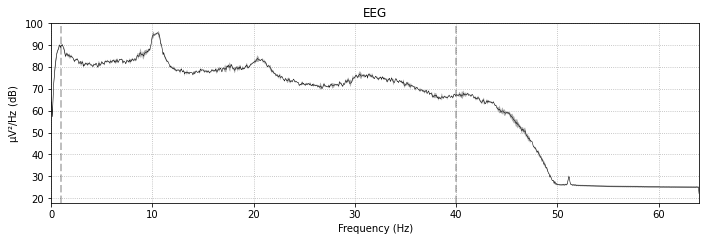

Text(0.5, 0.98, 'UnFiltered Cz')

In [23]:
#After Applying Low-pass Filter
fig = raw.plot_psd(fmax=64, average=True)
fig.subplots_adjust(top=0.85)
fig.suptitle('UnFiltered Cz', size='xx-large', weight='bold')

In [24]:
raw.set_montage(mne.channels.make_standard_montage('standard_alphabetic', head_size=0.095)) # Specifying the montage for digitized points visualization.

<RawArray | 2 x 125440 (980.0 s), ~1.9 MB, data loaded>

# Repairing artifacts in data using ICA (Independent Component Analysis)

Fitting ICA to data using 2 channels (please be patient, this may take a while)
Selecting by number: 2 components
Fitting ICA took 0.4s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
490 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
490 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


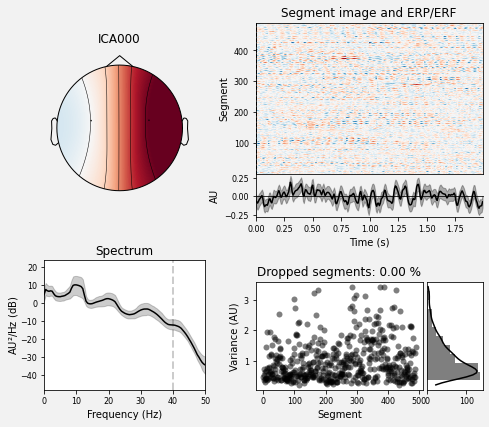

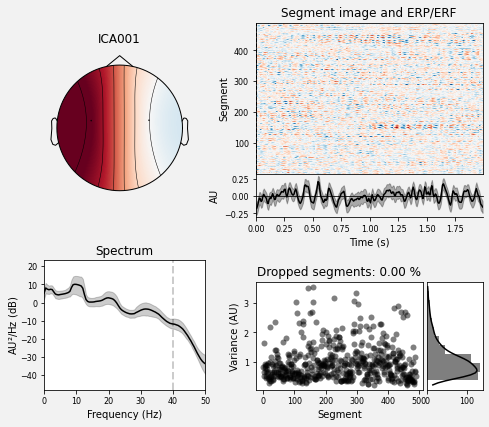

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [25]:
from mne.preprocessing import ICA, create_ecg_epochs
ica = mne.preprocessing.ICA(n_components = 2, random_state = 97, max_iter = 'auto')
ica.fit(raw)
ica.plot_properties(raw)

In [26]:
ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (2 components)
    Zeroing out 0 ICA components
    Projecting back using 2 PCA components


<RawArray | 2 x 125440 (980.0 s), ~1.9 MB, data loaded>

In [27]:
epochs =  mne.make_fixed_length_epochs(raw, duration = 7, preload = True) # Dividing raw into epoch components
data = epochs.get_data()
print(data.shape)

Not setting metadata
Not setting metadata
140 matching events found
No baseline correction applied
0 projection items activated
Loading data for 140 events and 896 original time points ...
0 bad epochs dropped
(140, 2, 896)


# Averaging data over epochs (trials)

No projector specified for this dataset. Please consider the method self.add_proj.


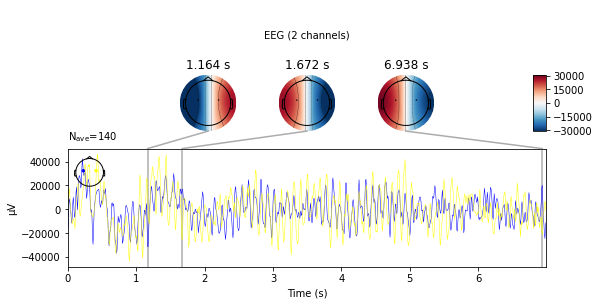

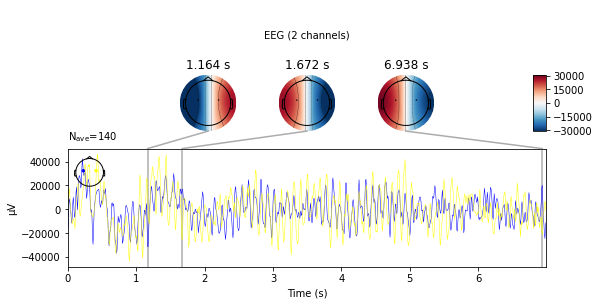

In [28]:
evoked = epochs.average()
evoked.plot_joint()

    Using multitaper spectrum estimation with 7 DPSS windows


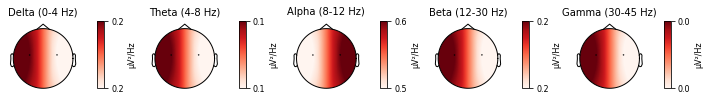

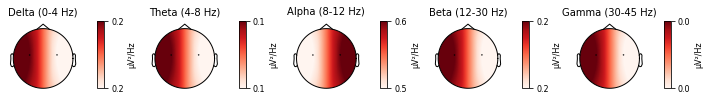

In [29]:
from matplotlib import cm
epochs.plot_psd_topomap(ch_type='eeg', normalize=True)

Applying baseline correction (mode: logratio)


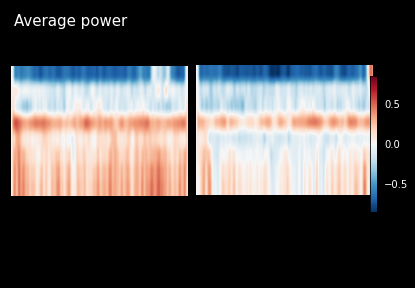

Applying baseline correction (mode: logratio)


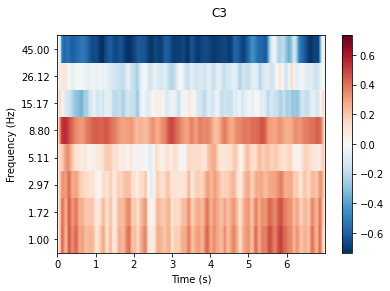

Applying baseline correction (mode: logratio)


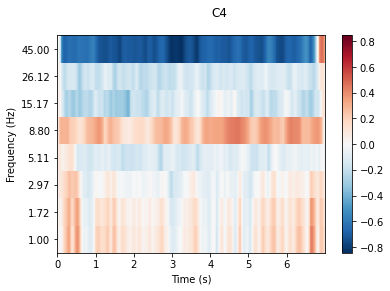

<Figure size 432x288 with 0 Axes>

In [30]:
from mne.time_frequency import tfr_morlet
freqs = np.logspace(*np.log10([1, 45]), num=8)
n_cycles = freqs / 2.  # different number of cycle per frequency
power, itc = tfr_morlet(epochs, freqs=freqs, n_cycles=n_cycles, use_fft=True,
                        return_itc=True, decim=3, n_jobs=1)
power.plot_topo(baseline=(-0.5, 0), mode='logratio', title='Average power')
power.plot([0], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[0])
power.plot([1], baseline=(-0.5, 0), mode='logratio', title=power.ch_names[1])
mne.viz.tight_layout()

# Converting Epochs to data for processing in Machine Learning

In [31]:
data = epochs.get_data()
print(data.shape)

(140, 2, 896)


In [32]:
output_data = pd.read_csv('y_train.csv', header=None)
output_data = np.array(output_data.loc[:,0].tolist())
print(output_data)

[1 2 2 2 2 1 1 2 2 1 1 2 1 2 2 2 2 1 1 1 1 2 1 2 1 2 2 2 2 1 1 2 1 2 1 1 1
 1 1 2 2 2 2 1 1 2 1 2 2 1 2 2 2 1 2 2 1 2 2 1 2 1 2 1 2 2 2 2 2 1 2 1 2 1
 1 1 1 2 1 2 1 2 2 1 1 1 2 1 1 1 1 1 1 2 2 1 2 1 1 1 2 2 2 1 2 2 2 1 1 2 2
 2 1 1 2 1 1 1 2 1 2 1 1 1 2 2 1 2 1 2 1 1 2 1 1 2 1 2 2 1]


# Feature Extraction

In [33]:
from mne_features.feature_extraction import extract_features
selected_funcs = ['app_entropy', 'time_corr'] #Using the following features for applying onto gridSearchCV
X_new =  extract_features(data, 128, selected_funcs)
X_logistic = extract_features(data, 128, ['std', 'app_entropy'])
X_RF = extract_features(data, 128, ['app_entropy', 'quantile', 'time_corr', 'mean'])

# Training epochs into Machine Learning models

In [34]:

!pip3 install scikit-learn
!pip3 install mne_features

You should consider upgrading via the 'c:\users\91974\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\91974\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [35]:
from mne_features.feature_extraction import extract_features, FeatureExtractor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Preparing data for training and testing

In [36]:
X_new.shape
X_logistic.shape
X_RF.shape

(140, 9)

In [37]:
output_data.shape

(140,)

In [38]:
Y = pd.read_csv('y_train.csv', header=None)
Y.head()

,0
0,1
1,2
2,2
3,2
4,2


In [39]:
X = pd.DataFrame(X_new)
X_logistic = pd.DataFrame(X_logistic)
X_RF = pd.DataFrame(X_RF)
X.head()

,0,1,2,3,4
0,1.157488,1.328505,-1.0,0.000000e+00,2.0
1,1.161839,1.234651,-1.0,0.000000e+00,2.0
2,1.201942,1.093556,-1.0,0.000000e+00,2.0
3,1.160224,1.154093,-1.0,1.110223e-16,2.0
4,1.248695,1.267240,-1.0,3.330669e-16,2.0


In [40]:
df2 = Y.rename({'0': '9'}, axis=1,inplace=True)
Y.head()

,0
0,1
1,2
2,2
3,2
4,2


In [41]:
X1=X.reset_index()
Y1=Y.reset_index()
comb_data=pd.concat([X1,Y1],join='outer',axis=1)
comb_data.head()

X_log1 = X_logistic.reset_index()
X_RF1 = X_RF.reset_index()

comb_data_log=pd.concat([X_log1,Y1],join='outer',axis=1)
comb_data_RF=pd.concat([X_RF1,Y1],join='outer',axis=1)

# Spliting Data into Training and testing

In [42]:
from sklearn.model_selection import train_test_split
training_data,testing_data=train_test_split(comb_data,test_size=0.20,random_state=4)
training_data_log,testing_data_log=train_test_split(comb_data_log,test_size=0.20,random_state=13)
training_data_RF,testing_data_RF=train_test_split(comb_data_RF,test_size=0.20,random_state=4)

# spliting input and target data

In [43]:
X_train=training_data.iloc[:,1:6].values
X_train_log=training_data_log.iloc[:,1:6].values
X_train_RF=training_data_RF.iloc[:,1:6].values
X_train.shape

(112, 5)

In [44]:
Y_train=training_data.iloc[:,7].values
Y_train.shape

(112,)

In [45]:
X_test=testing_data.iloc[:,1:6].values
X_test_log=testing_data_log.iloc[:,1:6].values
X_test_RF=testing_data_RF.iloc[:,1:6].values
Y_test=testing_data.iloc[:,7].values
Y_test.shape

(28,)

# Logistic Regression

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pipe = Pipeline([('scaler', StandardScaler()),
                 ('lr', LogisticRegression( solver='lbfgs'))]) 
kf = KFold(n_splits=5, shuffle=True, random_state=4)
scores = cross_val_score(pipe, X_train_log, Y_train, scoring='accuracy', cv=kf)
print('Cross-validation accuracy score without optimized parameters = %1.3f (+/- %1.5f)' % (np.mean(scores), np.std(scores)))

Cross-validation accuracy score without optimized parameters = 0.509 (+/- 0.09687)


In [47]:
params_grid = {'lr__C' : np.logspace(-4, 4, 20),
    'lr__solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'lr__max_iter' : [100, 1000,2500, 5000] }
kf = KFold(n_splits=5, shuffle=True, random_state=4)
gs = GridSearchCV(estimator=pipe, param_grid = params_grid, cv=kf, n_jobs = 1, return_train_score=True)
gs.fit(X_train_log,Y_train)
filename = 'linear_regression_model.sav'
pickle.dump(gs, open(filename, 'wb'))
print(" Best parameters for linear regression:" , gs.best_params_)

 Best parameters for linear regression: {'lr__C': 1.623776739188721, 'lr__max_iter': 100, 'lr__solver': 'lbfgs'}


In [48]:
gs_best = gs.best_estimator_
new_scores = cross_val_score(gs_best, X_train_log, Y_train, cv = kf)
print('Cross-validation accuracy score (with optimized parameters) = %1.3f '
      '(+/- %1.5f)' % (np.mean(new_scores), np.std(new_scores)))

Cross-validation accuracy score (with optimized parameters) = 0.527 (+/- 0.10288)


Accuracy Score on unseen test data : 0.5357142857142857


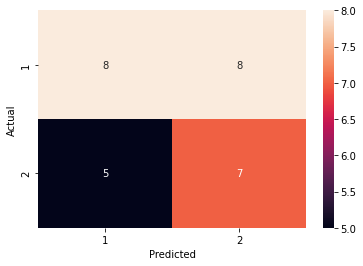

In [49]:
#predicting the values on the test data
y_pred=gs.predict(X_test_log)
#Analyzing the results
print('Accuracy Score on unseen test data : ' + str(accuracy_score(Y_test,y_pred)))
import seaborn as sn
conf_matrix=pd.crosstab(Y_test, y_pred,  rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_matrix, annot=True)
plt.show()

# Random Forest Classifier

In [50]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier
pipe = Pipeline([('scaler', StandardScaler()),
                 ('rf', RandomForestClassifier(criterion='entropy',random_state=0))]) 
kf = KFold(n_splits=2, shuffle=True, random_state=4)
scores = cross_val_score(pipe, X_train_RF, Y_train, scoring='accuracy', cv=kf)
print('Cross-validation accuracy score without optimized parameters = %1.3f (+/- %1.5f)' % (np.mean(scores), np.std(scores)))

Cross-validation accuracy score without optimized parameters = 0.518 (+/- 0.00000)


In [51]:
params_grid = {'rf__max_depth':[3,10,19],'rf__min_samples_split': [3,9,20],'rf__min_samples_leaf':[3,8,19],'rf__n_estimators':[400,550,600]  }
kf = KFold(n_splits=2, shuffle=True, random_state=4)
gs = GridSearchCV(estimator=pipe, param_grid = params_grid, cv=kf, n_jobs = 1, return_train_score=True)
gs.fit(X_train_RF,Y_train)
filename = 'random_forest_model.sav'
pickle.dump(gs, open(filename, 'wb'))
print(" Best parameters for random forest:" , gs.best_params_)

 Best parameters for random forest: {'rf__max_depth': 10, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 3, 'rf__n_estimators': 600}


In [52]:
gs_best = gs.best_estimator_
new_scores = cross_val_score(gs_best, X_train_RF, Y_train, cv = kf)
print('Cross-validation accuracy score (with optimized parameters) = %1.3f '
      '(+/- %1.5f)' % (np.mean(new_scores), np.std(new_scores)))

Cross-validation accuracy score (with optimized parameters) = 0.491 (+/- 0.00893)


Accuracy Score on unseen test data : 0.7142857142857143


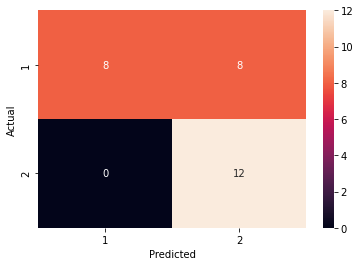

In [53]:
#predicting the values on the test data
y_pred=gs.predict(X_test_RF)
#Analyzing the results
print('Accuracy Score on unseen test data : ' + str(accuracy_score(Y_test,y_pred)))
import seaborn as sn
conf_matrix=pd.crosstab(Y_test, y_pred,  rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_matrix, annot=True)
plt.show()

# AdaBoost Algorithm

In [54]:
from sklearn.ensemble import AdaBoostClassifier
pipe = Pipeline([('scaler', StandardScaler()),
                 ('abc', AdaBoostClassifier(random_state=1))]) 
kf = KFold(n_splits=10, shuffle=True, random_state=4)
scores = cross_val_score(pipe, X_train, Y_train, scoring='accuracy', cv=kf)
print('Cross-validation accuracy score without optimized parameters = %1.3f (+/- %1.5f)' % (np.mean(scores), np.std(scores)))

Cross-validation accuracy score without optimized parameters = 0.608 (+/- 0.14477)


In [55]:
params_grid = {'abc__n_estimators': [1 ,50, 100], 'abc__learning_rate':[0.1, 0.7,1.0]}
kf = KFold(n_splits=10, shuffle=True, random_state=4)
gs = GridSearchCV(estimator=pipe, param_grid = params_grid, cv=kf, n_jobs = 1, return_train_score=True)
gs.fit(X_train,Y_train)
filename = 'ada_boost_model.sav'
pickle.dump(gs, open(filename, 'wb'))
print(" Best parameters for AdaBoost:" , gs.best_params_)

 Best parameters for AdaBoost: {'abc__learning_rate': 1.0, 'abc__n_estimators': 50}


In [56]:
gs_best = gs.best_estimator_
new_scores = cross_val_score(gs_best, X_train, Y_train, cv = kf)
print('Cross-validation accuracy score (with optimized parameters) = %1.3f '
      '(+/- %1.5f)' % (np.mean(new_scores), np.std(new_scores)))

Cross-validation accuracy score (with optimized parameters) = 0.608 (+/- 0.14477)


Accuracy Score on unseen test data : 0.6785714285714286


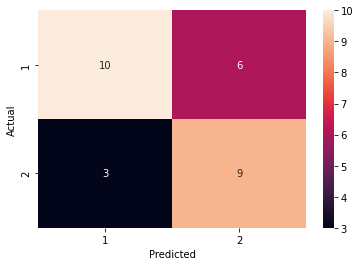

In [57]:
#predicting the values on the test data
y_pred=gs.predict(X_test)
#Analyzing the results
print('Accuracy Score on unseen test data : ' + str(accuracy_score(Y_test,y_pred)))
import seaborn as sn
conf_matrix=pd.crosstab(Y_test, y_pred,  rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_matrix, annot=True)
plt.show()

# Decision Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([('scaler', StandardScaler()),
                 ('dtc', DecisionTreeClassifier(criterion='entropy'))]) 
kf = KFold(n_splits=2, shuffle=True, random_state=4)
scores = cross_val_score(pipe, X_train, Y_train, scoring='accuracy', cv=kf)
print('Cross-validation accuracy score without optimized parameters = %1.3f (+/- %1.5f)' % (np.mean(scores), np.std(scores)))

Cross-validation accuracy score without optimized parameters = 0.491 (+/- 0.02679)


In [59]:
params_grid = {'dtc__criterion':['gini', 'entropy'],'dtc__max_depth':list(range(1,25)),'dtc__min_samples_split' :np.linspace(0.1,1.0, 10, endpoint=True), 'dtc__min_samples_leaf' : np.linspace(0.1, 0.5, 10, endpoint=True)}
kf = KFold(n_splits=2, shuffle=True, random_state=4)
gs = GridSearchCV(estimator=pipe, param_grid = params_grid, cv=kf, n_jobs = 1, return_train_score=True)
gs.fit(X_train,Y_train)
filename = 'decision_tree_classifier_model.sav'
pickle.dump(gs, open(filename, 'wb'))
print(" Best parameters for Decision Tree Classifier:" , gs.best_params_)

 Best parameters for Decision Tree Classifier: {'dtc__criterion': 'gini', 'dtc__max_depth': 1, 'dtc__min_samples_leaf': 0.1, 'dtc__min_samples_split': 0.1}


In [60]:
gs_best = gs.best_estimator_
new_scores = cross_val_score(gs_best, X_train, Y_train, cv = kf)
print('Cross-validation accuracy score (with optimized parameters) = %1.3f '
      '(+/- %1.5f)' % (np.mean(new_scores), np.std(new_scores)))

Cross-validation accuracy score (with optimized parameters) = 0.509 (+/- 0.02679)


Accuracy Score on unseen test data : 0.39285714285714285


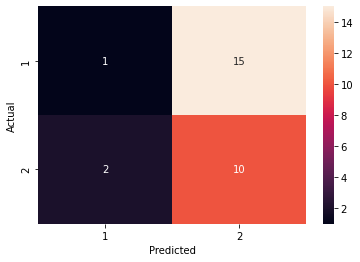

In [61]:
#predicting the values on the test data
y_pred=gs.predict(X_test)
#Analyzing the results
print('Accuracy Score on unseen test data : ' + str(accuracy_score(Y_test,y_pred)))
import seaborn as sn
conf_matrix=pd.crosstab(Y_test, y_pred,  rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_matrix, annot=True)
plt.show()

# XGBoost

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
pipe = Pipeline([('scaler', StandardScaler()),
                 ('xgb', GradientBoostingClassifier(random_state=1))]) 
kf = KFold(n_splits=5, shuffle=True, random_state=4)
scores = cross_val_score(pipe, X_train, Y_train, scoring='accuracy', cv=kf)
print('Cross-validation accuracy score without optimized parameters = %1.3f (+/- %1.5f)' % (np.mean(scores), np.std(scores)))

Cross-validation accuracy score without optimized parameters = 0.580 (+/- 0.10367)


In [63]:
params_grid = {
    "xgb__learning_rate": [0.01, 0.1, 1.0],
    "xgb__max_depth":[3,12,25],
    "xgb__max_features":["log2","sqrt"],
    "xgb__n_estimators":[1,25,100]
    }
kf = KFold(n_splits=5, shuffle=True, random_state=4)
gs = GridSearchCV(estimator=pipe, param_grid = params_grid, cv=kf, n_jobs = 1, return_train_score=True)
gs.fit(X_train,Y_train)
filename = 'xg_boost_model.sav'
pickle.dump(gs, open(filename, 'wb'))
print(" Best parameters for Gradient Boosting:" , gs.best_params_)

 Best parameters for Gradient Boosting: {'xgb__learning_rate': 1.0, 'xgb__max_depth': 3, 'xgb__max_features': 'log2', 'xgb__n_estimators': 25}


In [64]:
gs_best = gs.best_estimator_
new_scores = cross_val_score(gs_best, X_train, Y_train, cv = kf)
print('Cross-validation accuracy score (with optimized parameters) = %1.3f '
      '(+/- %1.5f)' % (np.mean(new_scores), np.std(new_scores)))

Cross-validation accuracy score (with optimized parameters) = 0.598 (+/- 0.08828)


Accuracy Score on unseen test data : 0.7142857142857143


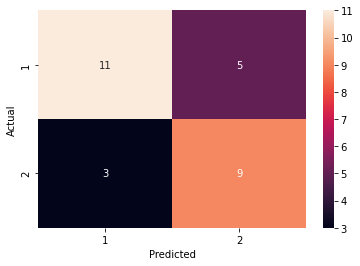

In [65]:
#predicting the values on the test data
y_pred=gs.predict(X_test)
#Analyzing the results
print('Accuracy Score on unseen test data : ' + str(accuracy_score(Y_test,y_pred)))
import seaborn as sn
conf_matrix=pd.crosstab(Y_test, y_pred,  rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_matrix, annot=True)
plt.show()

# KNN Classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier
pipe = Pipeline([('scaler', StandardScaler()),
                 ('knn', KNeighborsClassifier())]) 
kf = KFold(n_splits=2, shuffle=True, random_state=4)
scores = cross_val_score(pipe, X_train, Y_train, scoring='accuracy', cv=kf)
print('Cross-validation accuracy score without optimized parameters = %1.3f (+/- %1.5f)' % (np.mean(scores), np.std(scores)))

Cross-validation accuracy score without optimized parameters = 0.375 (+/- 0.05357)


In [67]:
params_grid = {'knn__leaf_size':list(range(1,30)), 'knn__n_neighbors':list(range(1,50)), 'knn__p': [1,2], 'knn__weights': ['uniform' , 'distance']}
kf = KFold(n_splits=2, shuffle=True, random_state=4)
gs = GridSearchCV(estimator=pipe, param_grid = params_grid, cv=kf, n_jobs = 1, return_train_score=True)
gs.fit(X_train,Y_train)
filename = 'knn_model.sav'
pickle.dump(gs, open(filename, 'wb'))
print(" Best parameters knn:" , gs.best_params_)

 Best parameters knn: {'knn__leaf_size': 1, 'knn__n_neighbors': 39, 'knn__p': 1, 'knn__weights': 'uniform'}


In [68]:
gs_best = gs.best_estimator_
new_scores = cross_val_score(gs_best, X_train, Y_train, cv = kf)
print('Cross-validation accuracy score (with optimized parameters) = %1.3f '
      '(+/- %1.5f)' % (np.mean(new_scores), np.std(new_scores)))

Cross-validation accuracy score (with optimized parameters) = 0.518 (+/- 0.05357)


Accuracy Score on unseen test data : 0.35714285714285715


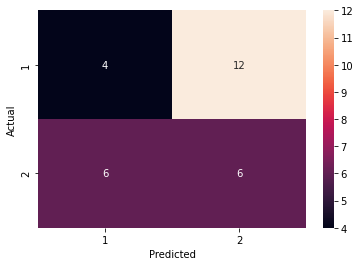

In [69]:
#predicting the values on the test data
y_pred=gs.predict(X_test)
#Analyzing the results
print('Accuracy Score on unseen test data : ' + str(accuracy_score(Y_test,y_pred)))
import seaborn as sn
conf_matrix=pd.crosstab(Y_test, y_pred,  rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_matrix, annot=True)
plt.show()

# Support Vector Classifier

In [70]:
from sklearn.svm import SVC
pipe = Pipeline([('scaler', StandardScaler()),
                 ('svc', SVC())]) 
kf = KFold(n_splits=10, shuffle=True, random_state=4)
scores = cross_val_score(pipe, X_train, Y_train, scoring='accuracy', cv=kf)
print('Cross-validation accuracy score without optimized parameters = %1.3f (+/- %1.5f)' % (np.mean(scores), np.std(scores)))

Cross-validation accuracy score without optimized parameters = 0.455 (+/- 0.11650)


In [71]:
params_grid = {'svc__C': [0.01, 0.1, 1, 10, 100, 1000], 'svc__gamma': [ 0.0001, 0.001, 0.01, 0.1, 1], 'svc__kernel': ['rbf' , 'linear']}
kf = KFold(n_splits=10, shuffle=True, random_state=4)
gs = GridSearchCV(estimator=pipe, param_grid = params_grid, cv=kf, n_jobs = 1, return_train_score=True)
gs.fit(X_train,Y_train)
filename = 'svc_model.sav'
pickle.dump(gs, open(filename, 'wb'))
print(" Best parameters support vector classifier:" , gs.best_params_)

 Best parameters support vector classifier: {'svc__C': 1, 'svc__gamma': 0.0001, 'svc__kernel': 'linear'}


In [72]:
gs_best = gs.best_estimator_
new_scores = cross_val_score(gs_best, X_train, Y_train, cv = kf)
print('Cross-validation accuracy score (with optimized parameters) = %1.3f '
      '(+/- %1.5f)' % (np.mean(new_scores), np.std(new_scores)))

Cross-validation accuracy score (with optimized parameters) = 0.510 (+/- 0.14861)


Accuracy Score on unseen test data : 0.5


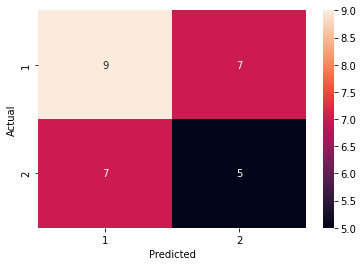

In [73]:
#predicting the values on the test data
y_pred=gs.predict(X_test)
#Analyzing the results
print('Accuracy Score on unseen test data : ' + str(accuracy_score(Y_test,y_pred)))
import seaborn as sn
conf_matrix=pd.crosstab(Y_test, y_pred,  rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_matrix, annot=True)
plt.show()

# ANN OR MLP

In [74]:
!pip3 install tensorflow
!pip3 install keras
import keras

You should consider upgrading via the 'c:\users\91974\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\91974\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [75]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import convolutional
from keras.layers import Dropout
from keras.layers import Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,GlobalAveragePooling1D,AveragePooling1D

In [76]:
myclassifier= Sequential()
myclassifier.add(Dense(input_dim = 5, activation = 'relu', units = 5))
myclassifier.add(Dense(activation = 'relu', units = 3))
myclassifier.add(BatchNormalization())
myclassifier.add(LeakyReLU())
# myclassifier.add(Dense(activation = 'relu', units = 288))
# myclassifier.add(BatchNormalization())
# myclassifier.add(LeakyReLU())
# myclassifier.add(Dropout(0.3))
# myclassifier.add(Dense(activation = 'relu', units = 144))
# myclassifier.add(BatchNormalization())
# myclassifier.add(LeakyReLU())
# myclassifier.add(Dropout(0.3))
# myclassifier.add(Dense(activation = 'relu', units = 24))
# myclassifier.add(BatchNormalization())
# myclassifier.add(LeakyReLU())
# myclassifier.add(Dropout(0.3))
myclassifier.add(Dense(activation = 'relu', units = 2))
myclassifier.add(BatchNormalization())
myclassifier.add(LeakyReLU())
myclassifier.add(Dropout(0.3))

In [77]:
myclassifier.add(Dense(units=1,activation='sigmoid'))

In [78]:
myclassifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
batch_normalization (BatchNo (None, 3)                 12        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 3)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2)                 8         
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 2)                 0

In [79]:
myclassifier.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [80]:
myclassifier.fit(X_train,Y_train,epochs=150)

Epoch 1/150
4/4 [==============================] - 1s 2ms/step - loss: 1.3903 - accuracy: 0.2679
Epoch 2/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3635 - accuracy: 0.2768
Epoch 3/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3725 - accuracy: 0.3036
Epoch 4/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3806 - accuracy: 0.2946
Epoch 5/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3325 - accuracy: 0.2946
Epoch 6/150
4/4 [==============================] - 0s 2ms/step - loss: 1.2839 - accuracy: 0.3393
Epoch 7/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3427 - accuracy: 0.3036
Epoch 8/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3426 - accuracy: 0.3482
Epoch 9/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3215 - accuracy: 0.3393
Epoch 10/150
4/4 [==============================] - 0s 2ms/step - loss: 1.3371 - accuracy: 0.3750
Epoch 11/150
4/4 [===========

4/4 [==============================] - 0s 2ms/step - loss: 1.0132 - accuracy: 0.4821
Epoch 84/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0311 - accuracy: 0.4821
Epoch 85/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0083 - accuracy: 0.4821
Epoch 86/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0131 - accuracy: 0.4821
Epoch 87/150
4/4 [==============================] - ETA: 0s - loss: 0.8740 - accuracy: 0.56 - 0s 2ms/step - loss: 1.0079 - accuracy: 0.4821
Epoch 88/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0043 - accuracy: 0.4821
Epoch 89/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0067 - accuracy: 0.4821
Epoch 90/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0053 - accuracy: 0.4821
Epoch 91/150
4/4 [==============================] - 0s 2ms/step - loss: 1.0119 - accuracy: 0.4821
Epoch 92/150
4/4 [==============================] - 0s 2ms/step - loss: 0.9835 - accuracy

# CSP with LDA

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mne.decoding import CSP

In [82]:
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
pipe = Pipeline([('CSP', csp), ('LDA', lda)])
kf = KFold(n_splits=2, shuffle=True, random_state=4)
scores = cross_val_score(pipe, data, output_data, scoring='accuracy', cv=kf)
print('Cross-validation accuracy score = %1.3f (+/- %1.5f)' % (np.mean(scores), np.std(scores)))

Computing rank from data with rank=None
    Using tolerance 0.007 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0069 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag)

# CSP with SVM

In [83]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
csp = CSP(n_components=3, reg=None, log=True, norm_trace=False)
pipe = Pipeline([('CSP', csp), ('svc', svc)])
kf = KFold(n_splits=2, shuffle=True, random_state=4)
scores = cross_val_score(pipe, data, output_data, scoring='accuracy', cv=kf)
print('Cross-validation accuracy score = %1.3f (+/- %1.5f)' % (np.mean(scores), np.std(scores)))

Computing rank from data with rank=None
    Using tolerance 0.007 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0069 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag)

In [84]:
params_grid = {'svc__C': [0.01, 0.1, 1, 10, 100, 1000], 'svc__gamma': [ 0.0001, 0.001, 0.01, 0.1, 1], 'svc__kernel': ['rbf' , 'linear']}
kf = KFold(n_splits=2, shuffle=True, random_state=4)
gs = GridSearchCV(estimator=pipe, param_grid = params_grid, cv=kf, n_jobs = 1, return_train_score=True)
gs.fit(data, output_data)
filename = 'csp_with_svm_model.sav'
pickle.dump(gs, open(filename, 'wb'))
print(" Best parameters " , gs.best_params_)

Computing rank from data with rank=None
    Using tolerance 0.007 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0069 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag)

Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0069 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.007 (

    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.007 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covarianc

    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.007 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0069 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data

Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.007 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0069 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  

Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.007 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0069 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (

    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0069 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covarian

    Using tolerance 0.0069 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.007 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data

Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.007 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0069 (2.2e-16 eps * 2 dim * 1.6e+13  

In [85]:
gs_best = gs.best_estimator_
new_scores = cross_val_score(gs_best, data, output_data, cv = kf)
print('Cross-validation accuracy score (with optimized parameters) = %1.3f '
      '(+/- %1.5f)' % (np.mean(new_scores), np.std(new_scores)))

Computing rank from data with rank=None
    Using tolerance 0.007 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0069 (2.2e-16 eps * 2 dim * 1.6e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag): 2
    MAG: rank 2 computed from 2 data channels with 0 projectors
Reducing data rank from 2 -> 2
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.0067 (2.2e-16 eps * 2 dim * 1.5e+13  max singular value)
    Estimated rank (mag)

# CNN

In [86]:
training_data_CNN = data.reshape(140, 1792)

In [87]:
data_train_cnn = np.array(training_data_CNN).reshape(training_data_CNN.shape[0], training_data_CNN.shape[1], 1)

In [88]:
print(data_train_cnn.shape)

(140, 1792, 1)


In [89]:
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout, LeakyReLU
# Create sequential model 
cnn_model = Sequential()
#First CNN layer  with 32 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=LeakyReLU(alpha=0.001), input_shape = (data_train_cnn.shape[1],1)))
#Second CNN layer  with 64 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=LeakyReLU(alpha=0.001)))
#Third CNN layer with 128 filters, conv window 3, relu activation and same padding
cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
cnn_model.add(MaxPool1D(pool_size=(3,), strides=2, padding='same'))
cnn_model.add(Dropout(0.5))
#Flatten the output
cnn_model.add(Flatten())
#Add a dense layer with 256 neurons
cnn_model.add(Dense(units = 256, activation=LeakyReLU(alpha=0.001)))
#Add a dense layer with 512 neurons
cnn_model.add(Dense(units = 512, activation=LeakyReLU(alpha=0.001)))
#Softmax as last layer with five outputs
cnn_model.add(Dense(units = 5, activation='softmax'))

In [90]:
cnn_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [91]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 1792, 32)          128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1792, 64)          6208      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1792, 128)         24704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 896, 128)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 896, 128)          0         
_________________________________________________________________
flatten (Flatten)            (None, 114688)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

In [92]:
cnn_model_history = cnn_model.fit(data_train_cnn, output_data, epochs=50, batch_size = 10)

Epoch 1/50
14/14 [==============================] - 3s 185ms/step - loss: 0.9044 - accuracy: 0.4929
Epoch 2/50
14/14 [==============================] - 2s 173ms/step - loss: 0.7230 - accuracy: 0.5286
Epoch 3/50
14/14 [==============================] - 2s 179ms/step - loss: 0.6718 - accuracy: 0.5786
Epoch 4/50
14/14 [==============================] - 2s 163ms/step - loss: 0.5862 - accuracy: 0.7214
Epoch 5/50
14/14 [==============================] - 2s 167ms/step - loss: 0.4301 - accuracy: 0.8214
Epoch 6/50
14/14 [==============================] - 2s 168ms/step - loss: 0.3010 - accuracy: 0.8714
Epoch 7/50
14/14 [==============================] - 2s 173ms/step - loss: 0.2312 - accuracy: 0.9000
Epoch 8/50
14/14 [==============================] - 2s 168ms/step - loss: 0.1857 - accuracy: 0.9143
Epoch 9/50
14/14 [==============================] - 2s 160ms/step - loss: 0.1295 - accuracy: 0.9357
Epoch 10/50
14/14 [==============================] - 2s 162ms/step - loss: 0.0964 - accuracy: 0.9571